## 1) mention about problem statement
## 2) talk about columns
## 3)install the models and required libraries
## 4)Load data set
## 5)understand your data
## 6)EDA
## i)univariate analysis
##  ii)Bi-variate analysis
##  iii)Multivarivate analysis
## 7)check the null-values or missing values
## i)treating the null values(fill with mean or median or mode)
## ii)drop null values if they are less than 5%-10%
## 8)check the duplicates
## i)drop duplicates
## 9)treating the ouliers
## i)check the outliers 
## ii)remove outliers
## iii)make the box plot before and after the outliers
## 10)Feature engineering
## a)i)extract the features
##  ii)create the features
##  iii)select the features
## b)checking the multicoliniarity
## i)heat map
## ii)vif technique
## c)transformation
## i)one hot encoding or label encoding
## d)scaling(min_max_scalar)
## 11)X-y features split
## 12)train test split

PROBLEM STATEMENT

Most banks have a large customer base - with different characteristics in terms of age, income, values, lifestyle, and more. Customer segmentation is the process of dividing a customer dataset into specific groups based on shared traits.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [3]:
data = pd.read_csv('bank_transactions.csv')
dt = data.copy()
df = dt.sample(100000)
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
441971,T441972,C6525119,14/9/92,M,BANDRA E MUMBAI,16665.55,16/8/16,135436,50.00
618662,T618663,C3027321,1/1/1800,NaN,MUMBAI,23.00,26/8/16,122827,85.00
317046,T317047,C5342511,7/9/84,M,CHENNAI,167612.50,15/8/16,1330,43.00
956234,T956235,C1117916,24/12/76,F,NEW DELHI,81.17,10/9/16,182406,696.00
610450,T610451,C8419916,20/10/80,M,KOLKATA,86.46,26/8/16,22627,772.00
...,...,...,...,...,...,...,...,...,...
335463,T335464,C3615344,5/8/89,M,GHAZIABAD,180804.86,15/8/16,192044,2157.70
978971,T978972,C4134743,28/1/88,M,CHENNAI,5065.02,15/9/16,142648,30.00
365993,T365994,C2341023,9/4/79,M,THANE,21760.48,14/8/16,191049,1145.00
498691,T498692,C8020262,15/6/84,M,DELHI,11327.78,20/8/16,223102,615.99


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 441971 to 282138
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TransactionID            100000 non-null  object 
 1   CustomerID               100000 non-null  object 
 2   CustomerDOB              99666 non-null   object 
 3   CustGender               99899 non-null   object 
 4   CustLocation             99991 non-null   object 
 5   CustAccountBalance       99759 non-null   float64
 6   TransactionDate          100000 non-null  object 
 7   TransactionTime          100000 non-null  int64  
 8   TransactionAmount (INR)  100000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 7.6+ MB


In [5]:
df.isna().sum()

TransactionID                0
CustomerID                   0
CustomerDOB                334
CustGender                 101
CustLocation                 9
CustAccountBalance         241
TransactionDate              0
TransactionTime              0
TransactionAmount (INR)      0
dtype: int64

In [6]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,9.975900e+04,100000.00000,100000.000000
mean,1.175060e+05,157158.95802,1574.400501
std,8.023521e+05,51192.27102,7166.450552
min,0.000000e+00,1.00000,0.000000
25%,4.667600e+03,123953.50000,160.000000
50%,1.676681e+04,164315.50000,457.485000
75%,5.780588e+04,200041.00000,1200.000000
max,6.138221e+07,235959.00000,991132.220000


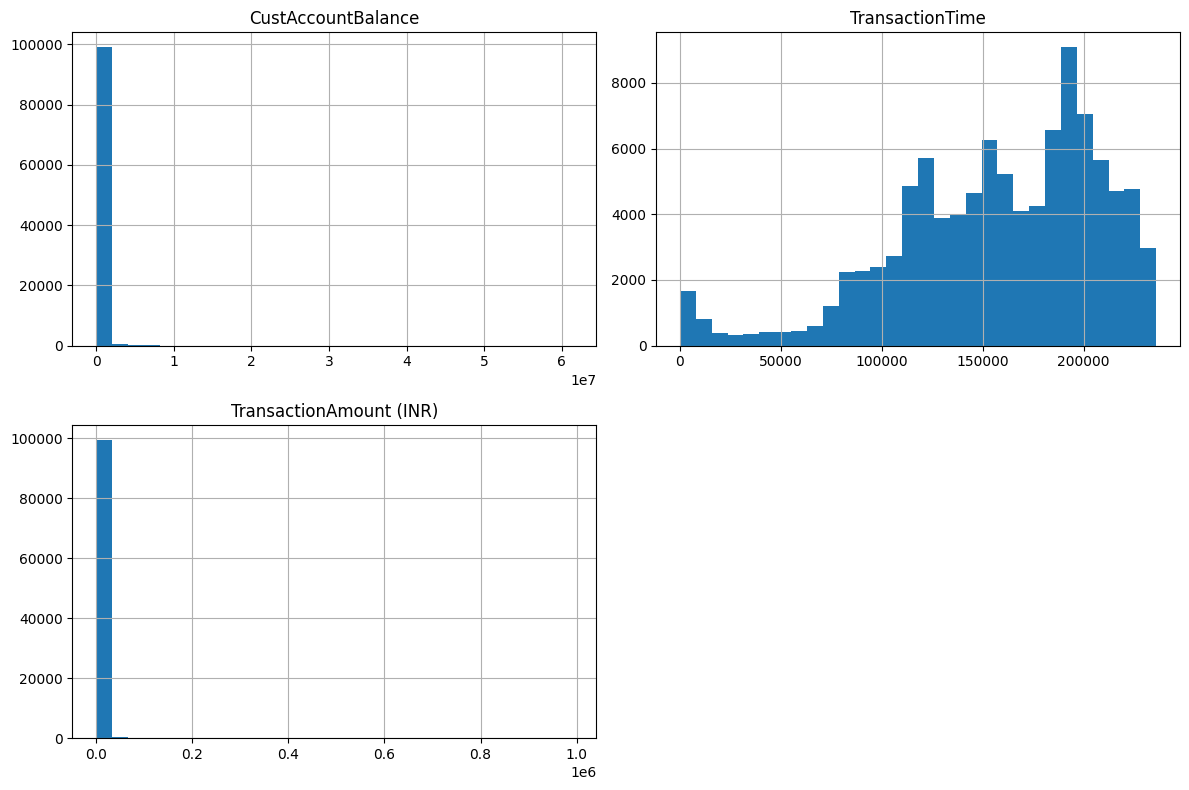

In [7]:
df.hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()

In [8]:
df = df.dropna(subset=['CustAccountBalance'])

In [9]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], errors='coerce')
df['Age'] = 2025 - df['CustomerDOB'].dt.year
df['Age'].fillna(df['Age'].median(), inplace=True)
df.drop(columns=['CustomerDOB'],inplace=True)
df.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
441971,T441972,C6525119,M,BANDRA E MUMBAI,16665.55,16/8/16,135436,50.0,33.0
618662,T618663,C3027321,NaN,MUMBAI,23.00,26/8/16,122827,85.0,225.0
317046,T317047,C5342511,M,CHENNAI,167612.50,15/8/16,1330,43.0,41.0
956234,T956235,C1117916,F,NEW DELHI,81.17,10/9/16,182406,696.0,49.0
610450,T610451,C8419916,M,KOLKATA,86.46,26/8/16,22627,772.0,45.0


In [10]:
df['CustGender'].fillna(df['CustGender'].mode()[0], inplace=True)
df['CustLocation'].fillna(df['CustLocation'].mode()[0],inplace=True)

In [11]:
df.isna().sum()

TransactionID              0
CustomerID                 0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
Age                        0
dtype: int64

In [12]:
df['TransactionDate']= pd.to_datetime(df['TransactionDate'],errors='coerce')
df['TransactionYear']= df['TransactionDate'].dt.year
df['TransactionMonth']= df['TransactionDate'].dt.month
df['TransactionDay']= df['TransactionDate'].dt.day

In [13]:
df['TransactionHours']= df['TransactionTime'] // 10000

In [14]:
df.drop(columns = ['TransactionDate','TransactionTime'], inplace=True )
df.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionYear,TransactionMonth,TransactionDay,TransactionHours
441971,T441972,C6525119,M,BANDRA E MUMBAI,16665.55,50.0,33.0,2016,8,16,13
618662,T618663,C3027321,M,MUMBAI,23.00,85.0,225.0,2016,8,26,12
317046,T317047,C5342511,M,CHENNAI,167612.50,43.0,41.0,2016,8,15,0
956234,T956235,C1117916,F,NEW DELHI,81.17,696.0,49.0,2016,10,9,18
610450,T610451,C8419916,M,KOLKATA,86.46,772.0,45.0,2016,8,26,2


In [15]:
lb = LabelEncoder()
df['CustGender']=lb.fit_transform(df['CustGender'])
df['CustLocation']=lb.fit_transform(df['CustLocation'])
df['TransactionID']=lb.fit_transform(df['TransactionID'])
df['CustomerID']=lb.fit_transform(df['CustomerID'])

In [16]:
df

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionYear,TransactionMonth,TransactionDay,TransactionHours
441971,40804,66911,1,357,16665.55,50.00,33.0,2016,8,16,13
618662,59438,24574,1,2436,23.00,85.00,225.0,2016,8,26,12
317046,27693,53024,1,772,167612.50,43.00,41.0,2016,8,15,0
956234,95028,1474,0,2668,81.17,696.00,49.0,2016,10,9,18
610450,58579,89912,1,1991,86.46,772.00,45.0,2016,8,26,2
...,...,...,...,...,...,...,...,...,...,...,...
335463,29582,31589,1,1362,180804.86,2157.70,36.0,2016,8,15,19
978971,97469,38240,1,772,5065.02,30.00,37.0,2016,9,15,14
365993,32841,16600,1,3856,21760.48,1145.00,46.0,2016,8,14,19
498691,46821,84965,1,976,11327.78,615.99,41.0,2016,8,20,22


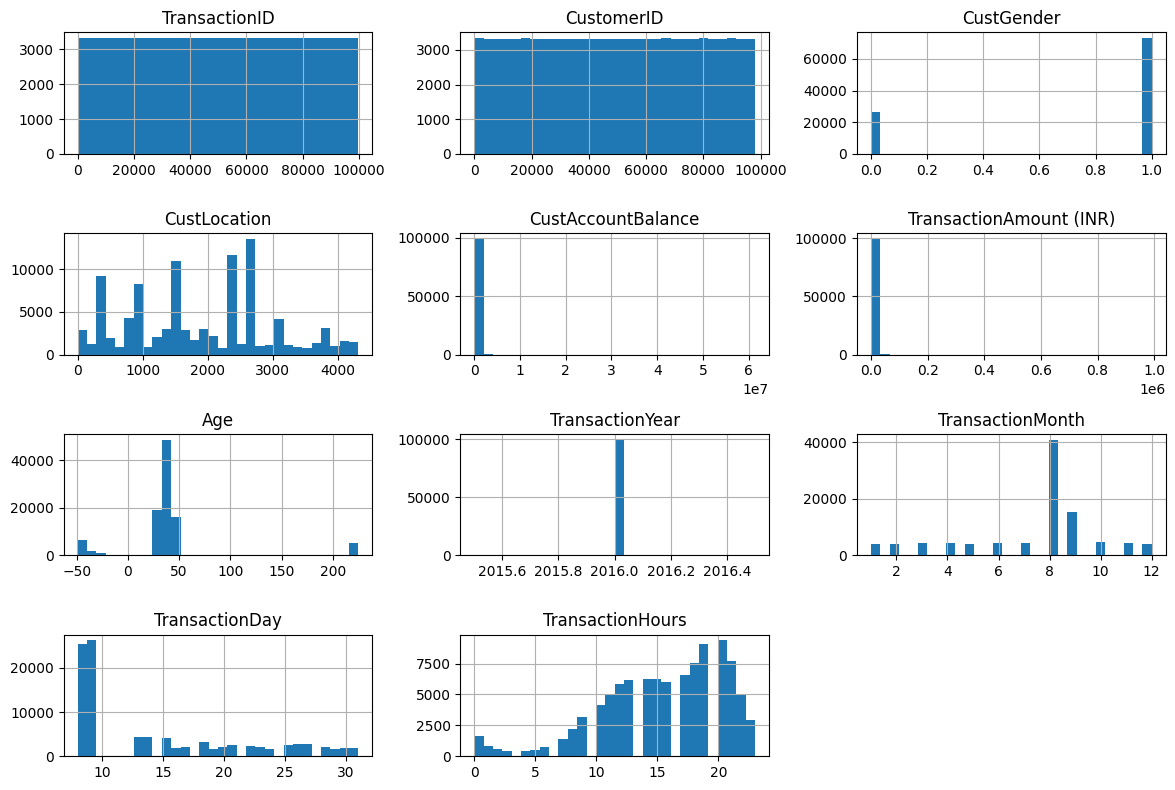

In [17]:
df.hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()

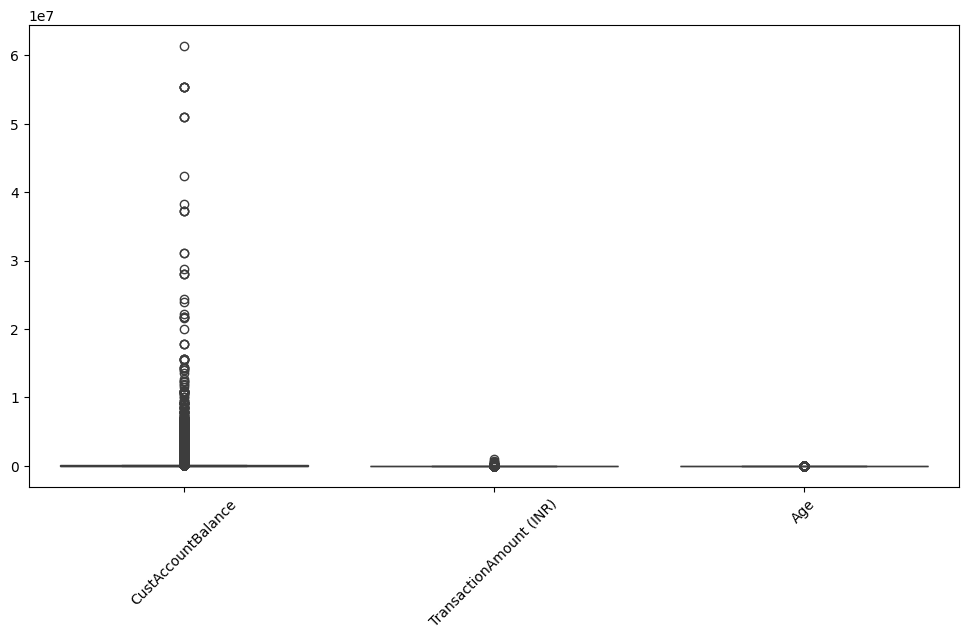

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['CustAccountBalance','TransactionAmount (INR)','Age']])
plt.xticks(rotation=45)
plt.show()

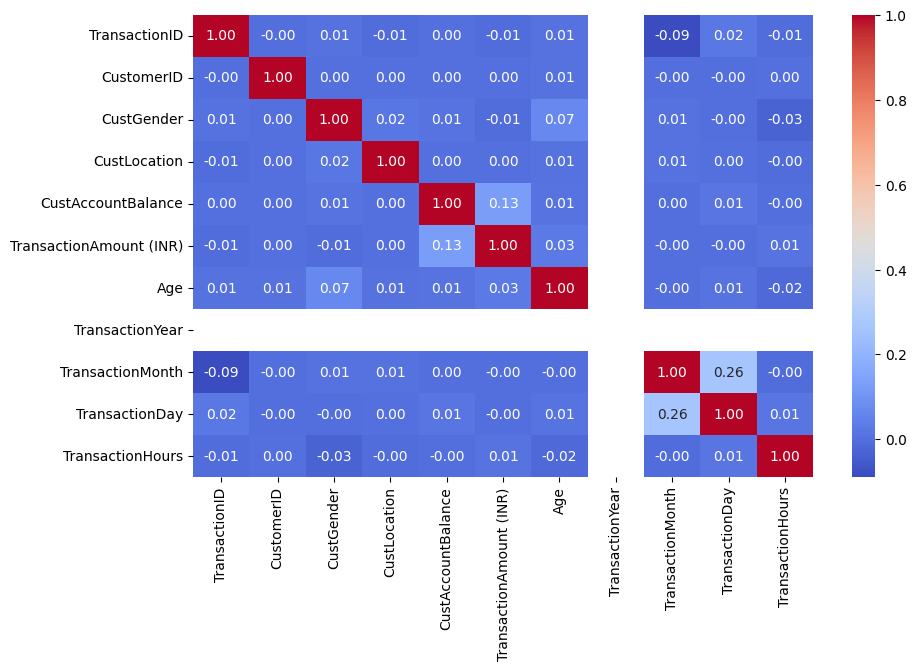

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


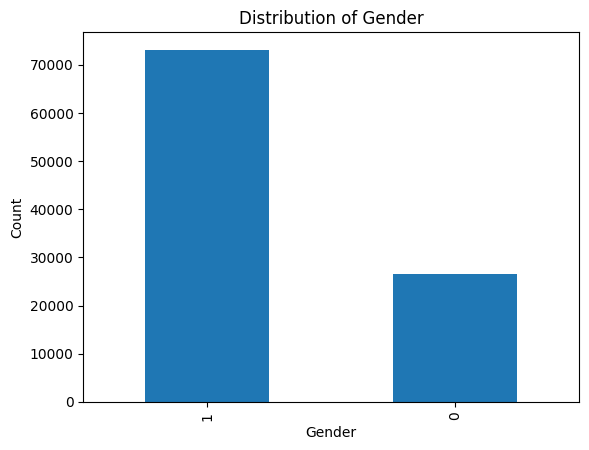

In [20]:
df['CustGender'].value_counts().plot(kind='bar')
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [21]:
fet=['CustGender','CustLocation','CustAccountBalance','TransactionAmount (INR)','Age','TransactionYear','TransactionMonth',
     'TransactionDay','TransactionHours']
scl=StandardScaler()
df_scl = scl.fit_transform(df[fet])
df_scl = pd.DataFrame(df_scl,columns=fet)
df_scl.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionYear,TransactionMonth,TransactionDay,TransactionHours
0,0.603805,-1.418097,-0.125682,-0.212630,-0.138133,0.0,0.247197,0.213309,-0.472154
1,0.603805,0.488066,-0.146424,-0.207747,3.651468,0.0,0.247197,1.582309,-0.667430
2,0.603805,-1.037598,0.062450,-0.213607,0.019767,0.0,0.247197,0.076409,-3.010745
3,-1.656164,0.700778,-0.146351,-0.122512,0.177667,0.0,1.005797,-0.744992,0.504227
4,0.603805,0.080061,-0.146345,-0.111910,0.098717,0.0,0.247197,1.582309,-2.620193


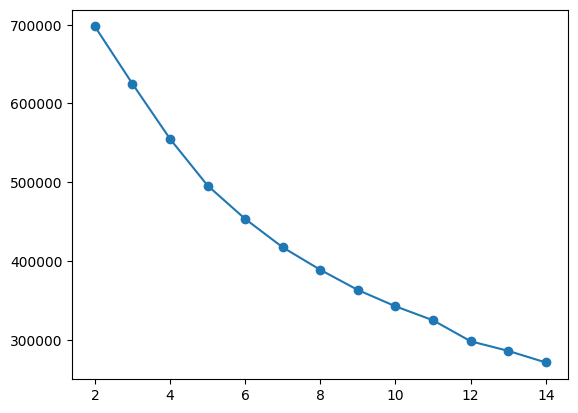

In [22]:
exp=[]
k = range(2,15)
for i in k:
    kmeans= KMeans(n_clusters = i, random_state= 42, n_init=10)
    kmeans.fit(df_scl)
    exp.append(kmeans.inertia_)
plt.plot(k,exp, marker='o',linestyle='-')
plt.show()

In [23]:
opt_k = 4
kmeans=KMeans(n_clusters=opt_k,random_state=42,init="k-means++")
df['Cluster']=kmeans.fit_predict(df_scl)
df[['CustAccountBalance','TransactionAmount (INR)','Age','Cluster']].head()

,CustAccountBalance,TransactionAmount (INR),Age,Cluster
441971,16665.55,50.0,33.0,2
618662,23.00,85.0,225.0,0
317046,167612.50,43.0,41.0,2
956234,81.17,696.0,49.0,1
610450,86.46,772.0,45.0,0


In [24]:
df.dtypes

TransactionID                int64
CustomerID                   int64
CustGender                   int64
CustLocation                 int64
CustAccountBalance         float64
TransactionAmount (INR)    float64
Age                        float64
TransactionYear              int32
TransactionMonth             int32
TransactionDay               int32
TransactionHours             int64
Cluster                      int32
dtype: object

In [25]:
df['TransactionAmount (INR)'] = pd.to_numeric(df['TransactionAmount (INR)'], errors='coerce')
df['CustAccountBalance'] = pd.to_numeric(df['CustAccountBalance'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [26]:
df.groupby("Cluster").mean()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionYear,TransactionMonth,TransactionDay,TransactionHours
Cluster,,,,,,,,,,,
0,48761.556330,49091.159420,0.99873,1921.847506,1.144141e+05,1527.929431,45.054998,2016.0,8.182738,23.731241,15.346092
1,49608.686364,48878.435575,0.00000,1871.570849,1.020256e+05,1647.251921,34.167693,2016.0,7.312885,14.448009,15.669760
2,50586.149591,49055.226646,1.00000,1911.999302,1.052328e+05,1517.334643,40.641050,2016.0,6.949452,9.782450,15.316306
3,50506.000000,54274.468750,0.93750,2099.187500,3.403342e+07,62682.062187,56.843750,2016.0,7.531250,17.812500,15.218750


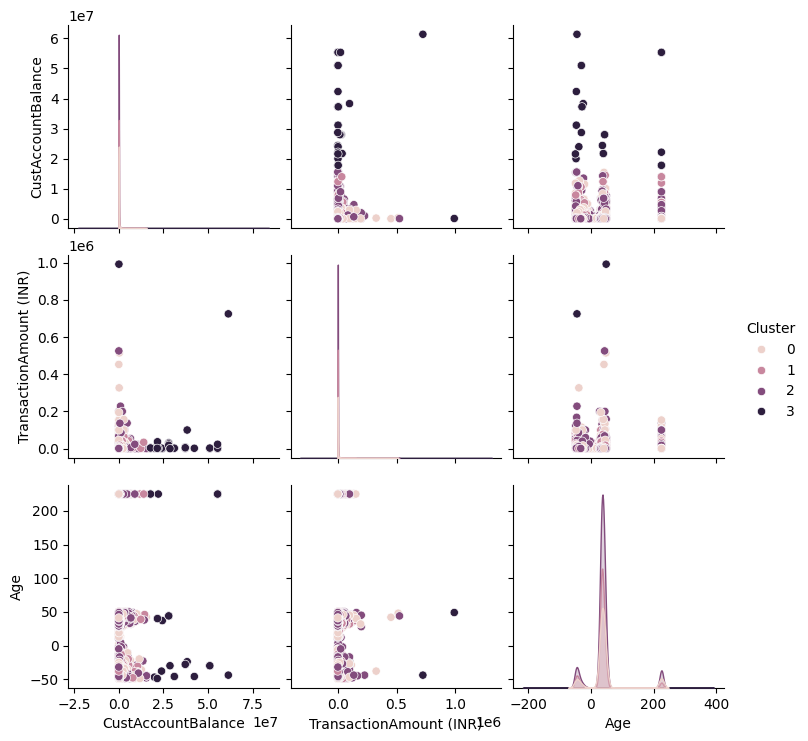

In [27]:
sns.pairplot(df,hue="Cluster", vars=['CustAccountBalance','TransactionAmount (INR)','Age'])
plt.show()